**Data Source:** Pleschberger, Martin, Zernig, Anja, & Kaestner, Andre. (2020). Equipment Sensor Data from Semiconductor Frontend Production (Version 1) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4282611

In [1]:
import os
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, f1_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!head -n 3 equipment1.csv
!echo
!head -n 3 equipment2.csv
!echo
!head -n 3 response.csv

lot;wafer;timestamp;sensor_1;sensor_2;sensor_3;sensor_4;sensor_5;sensor_6;sensor_7;sensor_8;sensor_9;sensor_10;sensor_11;sensor_12;sensor_13;sensor_14;sensor_15;sensor_16;sensor_17;sensor_18;sensor_19;sensor_20;sensor_21;sensor_22;sensor_23;sensor_24
lot2;1;timestamp_0;0.0;0.0;15.1604;105.417;99.18;0.0;2.77728;0.0;1.0;0.0;0.0;0.0;0.0;0.0;0.0;0.0;7.0;200.0;151.891;0.0;47.5;0.0;-1.0;19.05
lot2;1;timestamp_1;0.0;0.0;15.092;100.51;98.18;0.0;2.77465;0.0;1.0;0.91;4.0;0.0;0.0;0.0;0.0;0.0;7.0;200.0;151.40200000000004;0.0;48.5;0.0;-1.0;0.99

lot;wafer;timestamp;sensor_25;sensor_26;sensor_27;sensor_28;sensor_29;sensor_30;sensor_31;sensor_32;sensor_33;sensor_34;sensor_35;sensor_36;sensor_37;sensor_38;sensor_39;sensor_40;sensor_41;sensor_42;sensor_43;sensor_44;sensor_45;sensor_46;sensor_47;sensor_48;sensor_49;sensor_50;sensor_51;sensor_52;sensor_53;sensor_54;sensor_55;sensor_56
lot2;1;timestamp_0;0.0;382.64;99.0;11.0;0.0;0.0;0.3055033;1.443347;0.0;1.8520329999999997e-07;61.93445;0.0;0.5188147;0.40

In [3]:
sensors_1_to_24 = pd.read_csv('equipment1.csv', sep=';')
sensors_25_to_56 = pd.read_csv('equipment2.csv', sep=';')
response = pd.read_csv('response.csv', sep=';')

In [4]:
print(sensors_1_to_24.head(3))
print(response.head(3))

    lot  wafer    timestamp  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0  lot2      1  timestamp_0       0.0       0.0   15.1604  105.4170     99.18   
1  lot2      1  timestamp_1       0.0       0.0   15.0920  100.5100     98.18   
2  lot2      1  timestamp_2       0.0       0.0   15.0432   95.3093     95.18   

   sensor_6  sensor_7  sensor_8  sensor_9  sensor_10  sensor_11  sensor_12  \
0       0.0   2.77728       0.0       1.0       0.00        0.0        0.0   
1       0.0   2.77465       0.0       1.0       0.91        4.0        0.0   
2       0.0   2.86352       0.0       1.0       1.91        3.0        0.0   

   sensor_13  sensor_14  sensor_15  sensor_16  sensor_17  sensor_18  \
0        0.0        0.0        0.0        0.0        7.0      200.0   
1        0.0        0.0        0.0        0.0        7.0      200.0   
2        0.0        0.0        0.0        0.0        7.0      200.0   

   sensor_19  sensor_20  sensor_21  sensor_22  sensor_23  sensor_24  
0    15

In [5]:
print(sensors_1_to_24.shape)
print(sensors_25_to_56.shape)
print(response.shape)

(170896, 27)
(232144, 35)
(2638, 4)


In [6]:
sensors_1_to_24.lot = sensors_1_to_24.lot.str.replace('lot', '').astype('int64')
sensors_1_to_24.timestamp = sensors_1_to_24.timestamp.str.replace('timestamp_', '').astype('int64')

In [7]:
print(sensors_1_to_24['lot'].head(3))
print(sensors_25_to_56['timestamp'].head(3))
print(response['lot'].head(3))

0    2
1    2
2    2
Name: lot, dtype: int64
0    timestamp_0
1    timestamp_1
2    timestamp_2
Name: timestamp, dtype: object
0    lot2
1    lot2
2    lot2
Name: lot, dtype: object


In [8]:
sensors_25_to_56.lot = sensors_25_to_56.lot.str.replace('lot', '').astype('int64')
sensors_25_to_56.timestamp = sensors_25_to_56.timestamp.str.replace('timestamp_', '').astype('int64')

response['class'] = response['class'].replace(['good', 'bad'], [1, 0]).astype('int64')
response.lot = response.lot.str.replace('lot', '').astype('int64')

In [9]:
print(sensors_1_to_24['lot'].head(3))
print(sensors_25_to_56['timestamp'].head(3))
print(response['lot'].head(3))

0    2
1    2
2    2
Name: lot, dtype: int64
0    0
1    1
2    2
Name: timestamp, dtype: int64
0    2
1    2
2    2
Name: lot, dtype: int64


In [10]:
print("Equipment 1 dataset shape:", sensors_1_to_24.shape, \
      '\n'\
      "Equipment 2 dataset shape:", sensors_25_to_56.shape, \
      '\n'\
      "Response dataset shape:", response.shape)

Equipment 1 dataset shape: (170896, 27) 
Equipment 2 dataset shape: (232144, 35) 
Response dataset shape: (2638, 4)


In [11]:
print(sensors_1_to_24.isna().sum())
print(sensors_25_to_56.isna().sum())
print(response.isna().sum())

lot          0
wafer        0
timestamp    0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
sensor_20    0
sensor_21    0
sensor_22    0
sensor_23    0
sensor_24    0
dtype: int64
lot          0
wafer        0
timestamp    0
sensor_25    0
sensor_26    0
sensor_27    0
sensor_28    0
sensor_29    0
sensor_30    0
sensor_31    0
sensor_32    0
sensor_33    0
sensor_34    0
sensor_35    0
sensor_36    0
sensor_37    0
sensor_38    0
sensor_39    0
sensor_40    0
sensor_41    0
sensor_42    0
sensor_43    0
sensor_44    0
sensor_45    0
sensor_46    0
sensor_47    0
sensor_48    0
sensor_49    0
sensor_50    0
sensor_51    0
sensor_52    0
sensor_53    0
sensor_54    0
sensor_55    0
sensor_56    0
dtype: int64
lot         0
wafer       0
response    0
cl

In [12]:
sensors_1_to_24 = sensors_1_to_24.groupby(['lot', 'wafer']).mean()
sensors_25_to_56 = sensors_25_to_56.groupby(['lot', 'wafer']).mean()
response = response.groupby(['lot', 'wafer']).mean()

In [13]:
sensor_data = sensors_1_to_24.merge(sensors_25_to_56, on=['lot', 'wafer'], how='outer')
print(sensor_data.shape)
sensor_data.isna().sum()

(1319, 58)


timestamp_x    348
sensor_1       348
sensor_2       348
sensor_3       348
sensor_4       348
sensor_5       348
sensor_6       348
sensor_7       348
sensor_8       348
sensor_9       348
sensor_10      348
sensor_11      348
sensor_12      348
sensor_13      348
sensor_14      348
sensor_15      348
sensor_16      348
sensor_17      348
sensor_18      348
sensor_19      348
sensor_20      348
sensor_21      348
sensor_22      348
sensor_23      348
sensor_24      348
timestamp_y      0
sensor_25        0
sensor_26        0
sensor_27        0
sensor_28        0
sensor_29        0
sensor_30        0
sensor_31        0
sensor_32        0
sensor_33        0
sensor_34        0
sensor_35        0
sensor_36        0
sensor_37        0
sensor_38        0
sensor_39        0
sensor_40        0
sensor_41        0
sensor_42        0
sensor_43        0
sensor_44        0
sensor_45        0
sensor_46        0
sensor_47        0
sensor_48        0
sensor_49        0
sensor_50        0
sensor_51   

In [14]:
sensor_data.sample(3)

,,timestamp_x,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,timestamp_y,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52,sensor_53,sensor_54,sensor_55,sensor_56
lot,wafer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58,10,87.5,5.188162,5.284091,13.415411,42.905937,43.174432,0.000000,9.400730,0.566153,7.369318,11.619659,12.982955,0.000000,0.272369,0.272369,0.272369,0.272369,6.244318,396.601409,75.366590,9.789773,79.814773,215.722074,477.454545,1.040114,87.5,0.001398,248.364689,59.625000,7.079545,0.002614,20.730341,10.560991,75.089940,0.0,0.00184,37.362393,0.0,25.121936,41.659430,39.582994,194.473566,2.351451,118.932193,120.576380,1.005682,670.364955,30.836023,670.446494,15.998068,180.880682,29.995455,171.753409,120.473377,0.000006,377.147259,0.486594,0.602159
10,1,87.5,5.148530,5.244886,13.751288,42.965500,42.703636,0.000000,9.890497,1.800766,7.676136,12.033864,13.272727,0.000000,0.267386,0.267386,0.267386,0.267386,6.403409,408.684403,161.896182,10.096591,89.246591,212.313682,476.863636,1.027955,87.5,0.001464,229.924714,59.659091,6.738636,0.001932,22.150057,10.781096,77.875328,0.0,0.00191,37.008431,0.0,25.377007,45.246745,42.484470,209.517804,3.164631,118.685956,120.309686,0.994318,695.770739,32.792273,1338.347312,16.607216,182.284091,31.681818,176.039205,119.147210,0.000003,0.000010,0.775161,0.596534
16,11,87.5,5.182499,5.280682,13.750580,43.423383,43.147443,2.794648,9.520205,1.769726,7.568182,12.183466,13.715909,4.350085,0.267298,0.267298,0.267298,0.267298,6.392045,407.047415,161.828778,10.034091,91.834659,215.722295,477.431818,1.022670,87.5,0.001449,44.446114,61.363636,6.840909,0.002045,21.298125,10.456804,76.572560,0.0,0.00186,38.047485,0.0,23.393652,43.020276,40.271327,192.106215,3.066000,122.073697,123.761060,1.028409,162.732816,30.712273,824.074278,15.872216,177.306818,30.978409,179.736364,122.772669,0.000007,394.687391,0.476486,0.613580


In [15]:
response.isna().sum()

response    0
class       0
dtype: int64

In [16]:
data = sensor_data.merge(response, on=['lot', 'wafer'], how='outer')
print(data.shape)
data.isna().sum()

(1319, 60)


timestamp_x    348
sensor_1       348
sensor_2       348
sensor_3       348
sensor_4       348
sensor_5       348
sensor_6       348
sensor_7       348
sensor_8       348
sensor_9       348
sensor_10      348
sensor_11      348
sensor_12      348
sensor_13      348
sensor_14      348
sensor_15      348
sensor_16      348
sensor_17      348
sensor_18      348
sensor_19      348
sensor_20      348
sensor_21      348
sensor_22      348
sensor_23      348
sensor_24      348
timestamp_y      0
sensor_25        0
sensor_26        0
sensor_27        0
sensor_28        0
sensor_29        0
sensor_30        0
sensor_31        0
sensor_32        0
sensor_33        0
sensor_34        0
sensor_35        0
sensor_36        0
sensor_37        0
sensor_38        0
sensor_39        0
sensor_40        0
sensor_41        0
sensor_42        0
sensor_43        0
sensor_44        0
sensor_45        0
sensor_46        0
sensor_47        0
sensor_48        0
sensor_49        0
sensor_50        0
sensor_51   

In [17]:
data = data.dropna()

In [18]:
data = data.reset_index()
data.head()

,lot,wafer,timestamp_x,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,timestamp_y,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,sensor_52,sensor_53,sensor_54,sensor_55,sensor_56,response,class
0,2,1,87.5,5.231203,5.176705,13.251176,42.618787,43.066761,0.0,8.505448,0.0,7.267045,11.703011,12.346591,0.0,0.266298,0.266298,0.266298,0.266298,6.164773,398.018165,126.723761,9.778409,79.217614,208.905500,467.232955,0.983864,87.5,0.001495,232.694903,60.1875,6.6875,0.0,21.821591,11.296246,79.692877,0.0,0.001977,37.624962,0.0,21.595660,44.118530,42.609528,189.509110,1.660068,120.094154,122.751516,1.022727,690.483790,33.894318,1323.791176,16.962955,183.738636,33.119886,181.149432,121.631172,344.745734,0.000004,0.509069,0.607955,1.0278,0
1,2,2,87.5,5.196315,5.142614,13.666808,43.419169,43.147443,0.0,9.167583,0.0,7.607955,11.960227,12.761364,0.0,0.266162,0.266162,0.266162,0.266162,6.363636,408.363824,201.201568,10.329545,88.847159,208.953966,467.204545,1.017557,87.5,0.001500,245.951321,63.5625,7.0625,0.0,22.105284,10.849002,80.814970,0.0,0.001973,39.854000,0.0,22.763340,45.344954,43.932713,196.958829,2.555232,126.819666,129.624593,1.096591,729.909761,33.471932,1398.728761,16.871875,184.289773,33.414205,184.728977,128.418243,0.000006,396.140498,0.592390,0.642045,0.3906,1
2,2,3,87.5,5.161432,5.255114,13.243853,42.981363,42.650795,0.0,8.666924,0.0,7.295455,11.563523,12.551136,0.0,0.266903,0.266903,0.266903,0.266903,6.164773,398.137699,113.195898,9.727273,79.772727,212.313545,477.465909,0.987557,87.5,0.001505,243.975941,63.0000,7.0000,0.0,21.821420,11.063067,80.783452,0.0,0.001954,39.408217,0.0,22.018238,44.152238,43.927304,196.613328,1.506227,125.711287,128.485525,1.085227,724.134585,33.594432,1387.033733,16.950114,184.193182,33.901705,185.005682,127.305186,395.800252,0.000006,0.526011,0.636648,0.3906,1
3,2,4,87.5,5.175509,5.294318,13.671360,43.151993,42.904432,0.0,9.621476,0.0,7.613636,12.191591,13.215909,0.0,0.267062,0.267062,0.267062,0.267062,6.363636,408.062517,179.183085,10.164773,88.403409,212.313250,477.437500,1.015966,87.5,0.001509,246.357599,63.5625,7.0625,0.0,22.105057,10.858582,80.050300,0.0,0.001954,39.754566,0.0,21.757269,44.262521,41.514607,186.699584,2.946146,126.834402,129.642807,1.090909,731.288153,33.811364,1400.105239,16.922727,186.681818,33.025000,183.875000,128.404890,0.000007,394.003550,0.521722,0.641989,0.4050,1
4,2,5,87.5,5.201729,5.127273,13.332878,43.262745,43.001705,0.0,9.275963,0.0,7.335227,11.556989,12.568182,0.0,0.266392,0.266392,0.266392,0.266392,6.204545,398.231636,107.544619,9.715909,80.952273,208.906159,467.227273,1.011364,87.5,0.001499,246.561347,63.5625,7.0625,0.0,22.104545,11.069689,80.733545,0.0,0.001977,39.854118,0.0,22.053265,44.748803,43.069595,189.190050,2.231319,126.825392,129.619909,1.096591,731.981176,33.668523,1400.797193,16.985341,184.085227,33.340909,184.797159,128.457781,393.215546,0.000007,0.528508,0.641932,0.4050,1


In [19]:
data.dtypes

lot              int64
wafer            int64
timestamp_x    float64
sensor_1       float64
sensor_2       float64
sensor_3       float64
sensor_4       float64
sensor_5       float64
sensor_6       float64
sensor_7       float64
sensor_8       float64
sensor_9       float64
sensor_10      float64
sensor_11      float64
sensor_12      float64
sensor_13      float64
sensor_14      float64
sensor_15      float64
sensor_16      float64
sensor_17      float64
sensor_18      float64
sensor_19      float64
sensor_20      float64
sensor_21      float64
sensor_22      float64
sensor_23      float64
sensor_24      float64
timestamp_y    float64
sensor_25      float64
sensor_26      float64
sensor_27      float64
sensor_28      float64
sensor_29      float64
sensor_30      float64
sensor_31      float64
sensor_32      float64
sensor_33      float64
sensor_34      float64
sensor_35      float64
sensor_36      float64
sensor_37      float64
sensor_38      float64
sensor_39      float64
sensor_40  

In [20]:
print(data.lot.unique())
print(data.wafer.unique())

[  2   3   4   5   6   8  10  11  12  13  16  17  18  19  24  29  31  32
  35  37  40  47  49  50  51  52  54  58  60  61  65  67  70  72  74  76
  79  84  86 103]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


In [21]:
bad_class_sum = (data['class']==0).sum()
good_class_sum = (data['class']==1).sum()
print(bad_class_sum * 100 / (bad_class_sum + good_class_sum),"%")

17.507723995880536 %


In [22]:
def ECDF(df_column):
    '''returns sorted data as x and proportionate 0.0 to 1.0 y values'''
    x = np.sort(df_column)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

def ECDF_plot():
    plt.figure(figsize=(50.0,50.0))
    plt.subplots_adjust(hspace=0.5)
    for ax, n in list(enumerate(data.columns)):
        x, y = ECDF(data[n])
        plt.subplot(10, 10, ax+1)
        plt.grid(True)
        x_ecdf = plt.plot(x, y, marker='.', linestyle='none')
        plt.xlabel('%s readings' %n)
        plt.ylim(0, 1.0)
        plt.yticks(np.arange(0, 1.1, 0.1))
        plt.ylabel('ECDF')
        plt.margins(0.02)
        
#ECDF_plot()     #Uncomment for ECDF plots

In [23]:
print(data.corr()['class'].sort_values().head())
print(data.corr()['response'].sort_values().head())

response    -0.898600
sensor_24   -0.421485
sensor_2    -0.408268
sensor_1    -0.407393
sensor_5    -0.407297
Name: class, dtype: float64
class       -0.898600
sensor_3    -0.373243
sensor_20   -0.372276
sensor_7    -0.338698
sensor_47   -0.286064
Name: response, dtype: float64


**Classification**

In [24]:
target_list = ['response', 'class']
feature_list = list(set(data.columns) - set(target_list))

In [25]:
print(feature_list)

['sensor_42', 'sensor_53', 'sensor_16', 'sensor_43', 'sensor_8', 'sensor_18', 'lot', 'sensor_7', 'sensor_29', 'sensor_41', 'sensor_46', 'sensor_35', 'sensor_1', 'sensor_2', 'sensor_44', 'sensor_6', 'sensor_15', 'sensor_26', 'sensor_47', 'sensor_48', 'sensor_34', 'sensor_30', 'sensor_38', 'sensor_5', 'sensor_12', 'timestamp_x', 'sensor_17', 'sensor_10', 'sensor_22', 'sensor_24', 'sensor_56', 'wafer', 'sensor_20', 'sensor_32', 'sensor_19', 'sensor_33', 'sensor_55', 'sensor_51', 'sensor_23', 'sensor_52', 'sensor_28', 'sensor_25', 'sensor_37', 'sensor_21', 'sensor_45', 'sensor_54', 'sensor_27', 'sensor_11', 'timestamp_y', 'sensor_13', 'sensor_9', 'sensor_39', 'sensor_40', 'sensor_3', 'sensor_31', 'sensor_4', 'sensor_49', 'sensor_14', 'sensor_36', 'sensor_50']


In [26]:
sensor_list = [item for item in feature_list if item.startswith("sensor_")]
print(sensor_list)

['sensor_42', 'sensor_53', 'sensor_16', 'sensor_43', 'sensor_8', 'sensor_18', 'sensor_7', 'sensor_29', 'sensor_41', 'sensor_46', 'sensor_35', 'sensor_1', 'sensor_2', 'sensor_44', 'sensor_6', 'sensor_15', 'sensor_26', 'sensor_47', 'sensor_48', 'sensor_34', 'sensor_30', 'sensor_38', 'sensor_5', 'sensor_12', 'sensor_17', 'sensor_10', 'sensor_22', 'sensor_24', 'sensor_56', 'sensor_20', 'sensor_32', 'sensor_19', 'sensor_33', 'sensor_55', 'sensor_51', 'sensor_23', 'sensor_52', 'sensor_28', 'sensor_25', 'sensor_37', 'sensor_21', 'sensor_45', 'sensor_54', 'sensor_27', 'sensor_11', 'sensor_13', 'sensor_9', 'sensor_39', 'sensor_40', 'sensor_3', 'sensor_31', 'sensor_4', 'sensor_49', 'sensor_14', 'sensor_36', 'sensor_50']


**Sensor Data Scaling**

In [27]:
scaler = StandardScaler()
data[sensor_list] = scaler.fit_transform(data[sensor_list])

In [28]:
X_all_features = data[feature_list]
X_sensors_only = data[sensor_list]

**Test Train split**

In [29]:
X = X_all_features
y = data['class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
print(type(X_train))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
(776, 60)
(776,)
(195, 60)
(195,)


**Logistic Regression Classification before dummy encoding**

In [32]:
log_reg = LogisticRegression(max_iter=1000, random_state=157)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=157)

In [33]:
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

              precision    recall  f1-score   support

           0       0.50      0.35      0.41        26
           1       0.90      0.95      0.92       169

    accuracy                           0.87       195
   macro avg       0.70      0.65      0.67       195
weighted avg       0.85      0.87      0.86       195

              precision    recall  f1-score   support

           0       0.67      0.51      0.58       144
           1       0.89      0.94      0.92       632

    accuracy                           0.86       776
   macro avg       0.78      0.72      0.75       776
weighted avg       0.85      0.86      0.85       776



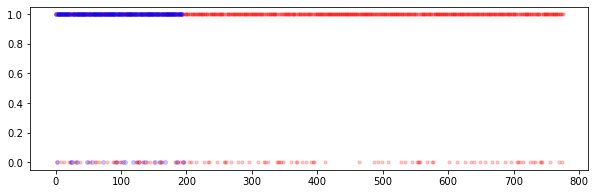

In [34]:
plt.figure(figsize=(10,3))
plt.ylim(-0.05, 1.05)

plt.scatter(np.arange(len(y_train)), y_pred_train, c='red', s=10, alpha=0.2);
plt.scatter(np.arange(len(y_test)), y_pred_test, c='blue', s=15, alpha=0.2);

print(classification_report(y_test, y_pred_test))
print(classification_report(y_train, y_pred_train))

**Feature Engineering** - **Dummy Encoding lots**

In [35]:
data_encoded = pd.get_dummies(data, columns=['lot', 'wafer'])

In [36]:
print(data_encoded.shape)
data_encoded.head();

(971, 125)


In [37]:
data_encoded.dtypes

timestamp_x    float64
sensor_1       float64
sensor_2       float64
sensor_3       float64
sensor_4       float64
                ...   
wafer_21         uint8
wafer_22         uint8
wafer_23         uint8
wafer_24         uint8
wafer_25         uint8
Length: 125, dtype: object

In [38]:
data_encoded.columns;

targets = ['response', 'class']
features = list(set(data_encoded.columns)-set(target_list))

In [39]:
X = data_encoded[features]
y = data_encoded['class']

In [40]:
print(X.shape, y.shape)
X.sample(3)

(971, 123) (971,)


,sensor_42,wafer_14,lot_37,lot_67,sensor_16,sensor_8,lot_12,sensor_18,sensor_41,sensor_46,sensor_44,lot_17,sensor_2,lot_8,sensor_26,sensor_6,sensor_15,sensor_34,lot_11,sensor_30,lot_52,sensor_5,timestamp_x,lot_6,lot_31,lot_51,wafer_6,lot_65,wafer_17,lot_24,sensor_32,sensor_33,sensor_19,sensor_55,lot_76,sensor_51,lot_5,sensor_23,sensor_28,lot_47,sensor_25,lot_74,sensor_21,lot_4,sensor_13,wafer_9,sensor_9,lot_61,lot_84,sensor_39,...,wafer_24,lot_32,wafer_4,lot_50,sensor_48,wafer_25,lot_16,sensor_38,sensor_12,sensor_56,sensor_17,sensor_10,sensor_22,sensor_24,wafer_21,wafer_16,lot_3,lot_35,wafer_20,sensor_20,lot_86,lot_49,lot_10,wafer_5,lot_103,sensor_52,lot_13,lot_18,wafer_13,sensor_37,lot_79,sensor_14,sensor_54,sensor_45,sensor_27,wafer_12,lot_70,wafer_10,sensor_11,wafer_8,timestamp_y,wafer_19,sensor_40,wafer_3,sensor_3,lot_40,sensor_49,wafer_22,sensor_36,lot_58
847,-0.004165,0,0,0,-1.874482,-0.207424,0,-1.455385,0.006303,0.220510,0.240720,0,-1.105885,0,0.561312,-0.245597,-1.882556,0.362320,0,0.049154,0,-1.108643,87.5,0,0,0,0,0,0,0,0.328726,-0.032108,0.305220,2.437237,1,0.203849,0,-1.883813,-0.250021,0,0.281647,0,1.763907,0,-1.924675,0,-1.251564,0,0,0.381329,...,0,0,0,0,-0.053456,0,0,0.686046,-0.270048,0.150277,-1.368453,-0.682604,-2.258503,-1.209388,0,0,0,0,0,1.055960,0,0,0,0,0,0.137826,0,0,0,-0.779912,0,-1.924675,-1.007057,0.705779,0.100067,0,0,0,-1.190504,0,87.5,0,-0.578359,0,1.050368,0,-0.463140,0,-0.032108,0
45,-0.165276,0,0,0,0.714134,1.664217,0,1.193367,0.788659,-0.244904,-0.283211,0,0.906633,0,1.070742,-0.245597,0.713096,-0.052418,0,0.527668,0,0.912325,87.5,0,0,0,0,0,0,0,-0.057502,-0.032108,2.136773,-0.453191,0,0.591826,0,1.482670,-0.313557,0,-0.324796,0,-0.498359,0,0.681931,0,1.095516,0,0,-0.122718,...,0,0,0,0,0.064526,0,0,0.172076,-0.270048,-0.241183,0.993301,0.912737,0.388981,0.809852,0,0,1,0,0,-0.869918,0,0,0,0,0,-0.232662,0,0,0,0.512923,0,0.681931,-1.007057,0.821089,-0.289195,0,0,0,0.632435,0,87.5,0,0.146379,0,-0.916600,0,0.326468,1,-0.032108,0
652,-0.408699,0,0,0,0.765929,1.060084,0,1.450078,-0.426524,-0.235529,-0.414194,0,0.861974,0,1.074332,-0.245597,0.765031,-0.537521,0,-0.725361,0,0.895427,87.5,0,0,0,0,0,0,0,-0.660352,-0.032108,-0.408800,-0.423460,0,-0.123459,0,1.481308,0.406516,0,-0.844592,0,-0.497258,0,0.737428,0,1.984935,0,0,-0.127885,...,0,0,0,0,-0.086689,0,0,-0.265739,-0.270048,-0.361231,1.780553,1.386230,0.404932,1.004144,0,0,0,0,0,-0.879031,0,0,0,0,0,-0.374229,0,0,0,0.512840,0,0.737428,-1.007057,0.907578,-0.418949,0,0,0,0.533228,0,87.5,0,0.356507,0,-0.906989,0,0.148901,0,-0.032108,1


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2)

**Logistic regression**

In [42]:
log_reg = LogisticRegression(max_iter=1000, random_state=157)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=157)

In [43]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [44]:
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        34
           1       0.92      0.94      0.93       161

    accuracy                           0.88       195
   macro avg       0.80      0.78      0.79       195
weighted avg       0.88      0.88      0.88       195

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       136
           1       0.96      0.96      0.96       640

    accuracy                           0.94       776
   macro avg       0.89      0.89      0.89       776
weighted avg       0.94      0.94      0.94       776



**Decision Tree**

In [45]:
list(np.arange(1,3))

[1, 2]

In [46]:
log_hyper = {'penalty':'L2', 'max_iter':1000, 'class_weight':0}
decision_hyper = {'criterion':'gini', 'max_depth':2, 'class_weight':0}

In [47]:
fail_f1_score = []
for depth in np.arange(1,31):
    decision_tree = tree.DecisionTreeClassifier(max_depth=depth, random_state=157)
    decision_tree.fit(X_train, y_train)
    y_train_pred = decision_tree.predict(X_train)
    y_test_pred = decision_tree.predict(X_test)
    fail_f1_score.append(f1_score(y_test, y_test_pred, pos_label=0))

2 , 0.6315789473684211


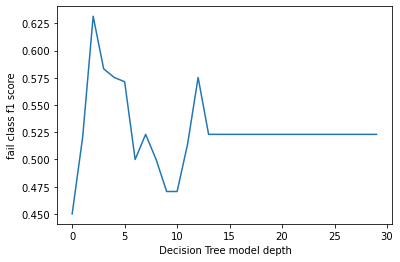

In [48]:
plt.plot(np.arange(len(fail_f1_score)), fail_f1_score)
plt.xlabel(' Decision Tree model depth', size=10)
plt.ylabel('fail class f1 score', size=10)
print(fail_f1_score.index(max(fail_f1_score)), ',', max(fail_f1_score))
best_depth = fail_f1_score.index(max(fail_f1_score))

0.5205479452054794
              precision    recall  f1-score   support

           0       0.49      0.56      0.52        34
           1       0.90      0.88      0.89       161

    accuracy                           0.82       195
   macro avg       0.70      0.72      0.71       195
weighted avg       0.83      0.82      0.83       195

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       136
           1       0.95      0.92      0.93       640

    accuracy                           0.89       776
   macro avg       0.80      0.83      0.82       776
weighted avg       0.90      0.89      0.89       776



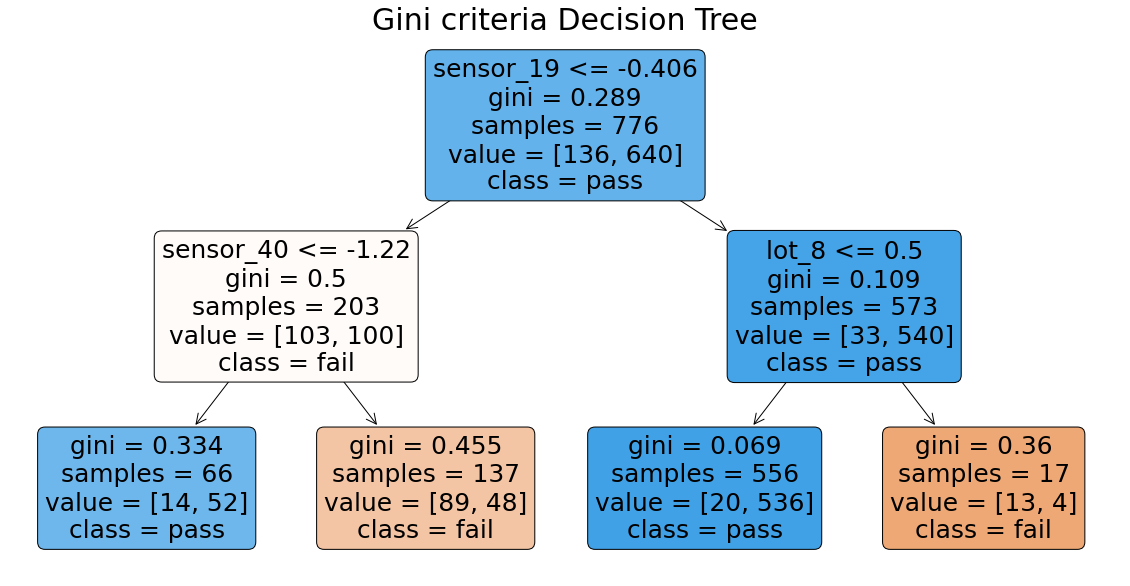

In [49]:
decision_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=best_depth, random_state=157)
decision_tree.fit(X_train, y_train)

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

print(f1_score(y_test, y_test_pred, pos_label=0))
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

plt.figure(figsize=(20,10))
decision_tree_plot = tree.plot_tree(decision_tree, filled=True, rounded=True, feature_names=X_train.columns, class_names=["fail", "pass"])
plt.title('Gini criteria Decision Tree', size=30)
plt.show()

0.5205479452054794
              precision    recall  f1-score   support

           0       0.49      0.56      0.52        34
           1       0.90      0.88      0.89       161

    accuracy                           0.82       195
   macro avg       0.70      0.72      0.71       195
weighted avg       0.83      0.82      0.83       195

              precision    recall  f1-score   support

           0       0.66      0.75      0.70       136
           1       0.95      0.92      0.93       640

    accuracy                           0.89       776
   macro avg       0.80      0.83      0.82       776
weighted avg       0.90      0.89      0.89       776



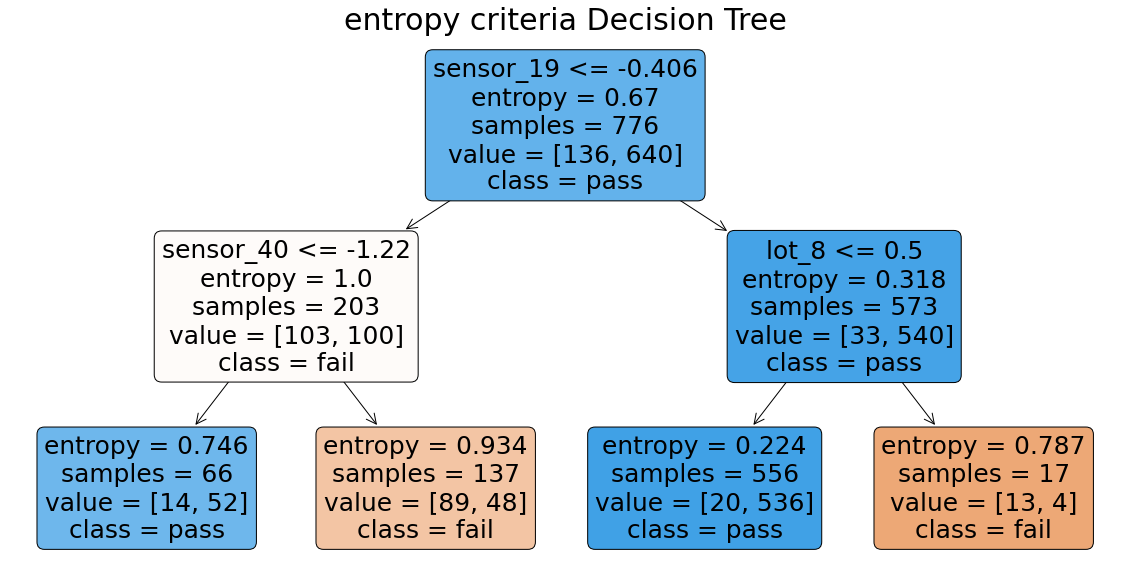

In [50]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_depth, random_state=157)
decision_tree.fit(X_train, y_train)

y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

print(f1_score(y_test, y_test_pred, pos_label=0))
print(classification_report(y_test, y_test_pred))
print(classification_report(y_train, y_train_pred))

plt.figure(figsize=(20,10))
decision_tree_plot = tree.plot_tree(decision_tree, filled=True, rounded=True, feature_names=X_train.columns, class_names=["fail", "pass"])
plt.title('entropy criteria Decision Tree', size=30)
plt.show()

**Random Forest**

In [51]:
fail_f1_score = []
for estimator in np.arange(1,31):
    rand_for = RandomForestClassifier(n_estimators=estimator, random_state=157)
    rand_for.fit(X_train, y_train)
    y_train_pred = rand_for.predict(X_train)
    y_test_pred = rand_for.predict(X_test)
    fail_f1_score.append(f1_score(y_test, y_test_pred, pos_label=0))

15 , 0.5423728813559322


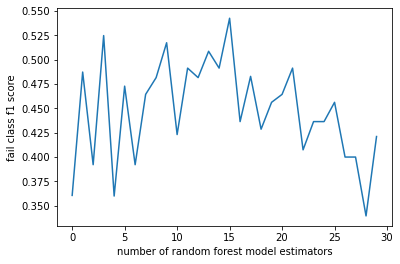

In [52]:
plt.plot(np.arange(len(fail_f1_score)), fail_f1_score)
plt.xlabel('number of random forest model estimators', size=10)
plt.ylabel('fail class f1 score', size=10)
print(fail_f1_score.index(max(fail_f1_score)), ',', max(fail_f1_score))
best_estimators = fail_f1_score.index(max(fail_f1_score))

In [53]:
rand_for = RandomForestClassifier(n_estimators=best_estimators, random_state=157)
rand_for.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=157)

In [54]:
y_train_pred = rand_for.predict(X_train)
y_test_pred = rand_for.predict(X_test)

In [55]:
print(classification_report(y_test, y_test_pred, labels=[0,1]))
print(classification_report(y_train, y_train_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.61      0.41      0.49        34
           1       0.88      0.94      0.91       161

    accuracy                           0.85       195
   macro avg       0.75      0.68      0.70       195
weighted avg       0.84      0.85      0.84       195

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       136
           1       1.00      1.00      1.00       640

    accuracy                           1.00       776
   macro avg       1.00      1.00      1.00       776
weighted avg       1.00      1.00      1.00       776



In [56]:
rand_for = RandomForestClassifier(n_estimators=200, random_state=157)
rand_for.fit(X_train, y_train)
y_train_pred = rand_for.predict(X_train)
y_test_pred = rand_for.predict(X_test)
f1_score(y_test, y_test_pred, pos_label=0)

0.42857142857142855